<h1>Student Study Hours Prediction</h1>
<div>Build small regression model to predict student score based on his study hours</div>
<div>Ammar Sayed</div>

#### 1. Imports 👍

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42
np.random.seed(SEED)

Read data 🚪

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Build Some EDAs 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We have one float and one int feature but no categorical features

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

The dataset has no null values, that's good no wasting of time to handle missing values 🎉

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

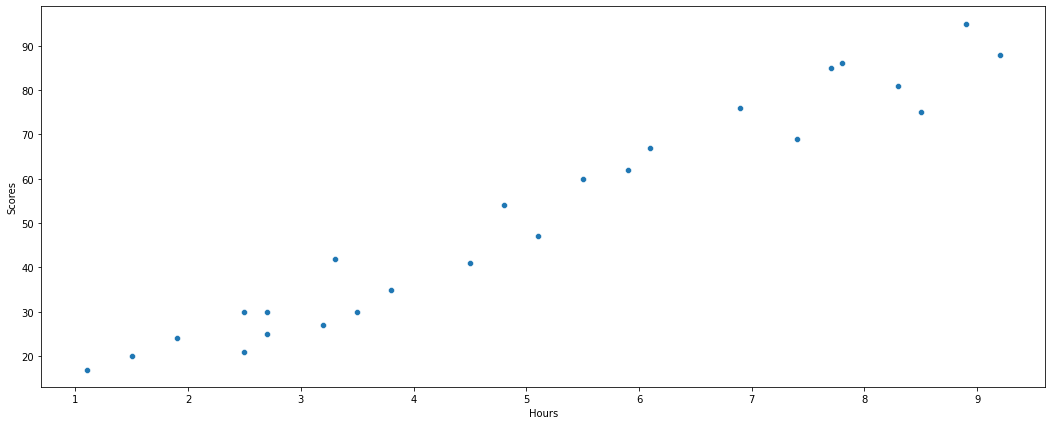

In [34]:
plt.figure(figsize=(18, 7))
sns.scatterplot(x=df['Hours'], y=df['Scores'])

It seems that the data is good there is no outliers, the more hours you study the more scores you get

#### 2. Split data

In [9]:
# split target and train
y = df['Scores']
X = df.drop('Scores', axis=1)

y.shape, X.shape

((25,), (25, 1))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

print(f'train: X = {x_train.shape}, Y={y_train.shape}')
print(f'test: X = {x_test.shape}, Y={y_test.shape}')

train: X = (20, 1), Y=(20,)
test: X = (5, 1), Y=(5,)


#### 3. Scale the data

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_trian_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f'train scaled: {x_trian_scaled[0]}')
print(f'test scaled: {x_test_scaled[0]}')

train scaled: [0.19753086]
test scaled: [0.88888889]


#### 4. Build Regression Model
because it has only one feature, it's better to use linear regression model

In [57]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(x_trian_scaled, y_train)

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_reg, x_trian_scaled, y_train, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {np.mean(scores)}')

Scores: [0.54971008 0.95901532 0.87721205 0.63164104 0.95923907]
Mean Score: 0.7953635134250876


Plot Regression line

In [58]:
y_train = np.array(y_train).reshape(-1, 1)

Text(0, 0.5, 'Study Hours')

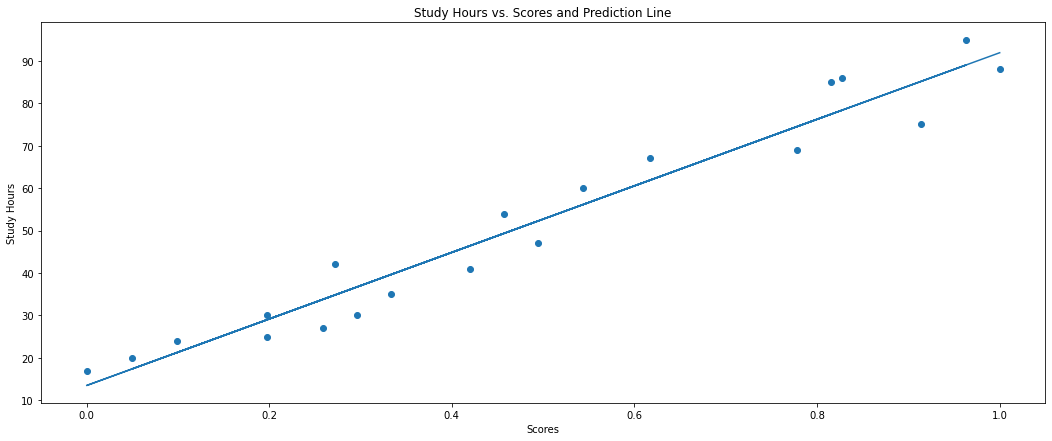

In [68]:
line = linear_reg.intercept_ + linear_reg.coef_*x_trian_scaled

plt.figure(figsize=(18, 7))
plt.scatter(x_trian_scaled, y_train)
plt.plot(x_trian_scaled, line)

plt.title('Study Hours vs. Scores and Prediction Line')
plt.xlabel('Scores')
plt.ylabel('Study Hours')

#### 5. EValuate Using MSE

In [21]:
y_pred = linear_reg.predict(x_test_scaled)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 18.9432117223153
RMSE: 4.3523800066532905


#### 6. Prediction

In [76]:
test_val = [9.25]
test_val_scaled = scaler.transform([test_val])
print(f'Test Value: {test_val}')

prediction = linear_reg.predict(test_val_scaled)
print(f'Prediction: {prediction}')

Test Value: [9.25]
Prediction: [[92.38611528]]
